## Loading The Dataset

In [53]:
# dataframing
import pandas as pd
import numpy as np

#Filling the NaN value by performing imputation algortihm
from fancyimpute import IterativeImputer

# defining correlation
import matplotlib.pyplot as plt
import seaborn  as sns 

# visualize missing values in dataset
# Importing the libraries
import pandas as pd
import missingno as msno

# train-test data split
from sklearn.model_selection import train_test_split

# PCA model, scatter plot to visualize unbalanced data
from sklearn.decomposition import PCA

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
# undersampling
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation   
            
#import machine learnings packages
from sklearn.svm import SVC # Support vector classifier
from sklearn.ensemble import RandomForestClassifier# Random Forest Classifier
from sklearn.neural_network import MLPClassifier# Neural Network Model (Multi-layer Perceptron)
from sklearn.metrics import plot_roc_curve# Plot ROC

#model evaluation purpose
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve

#calculate confidence inerval 
import scipy.stats as st

In [6]:
df = pd.read_csv('HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Take a look at our dataset

In [7]:
# get the summary of the numerical data
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [8]:
# get the summary of the categorical data
df.describe(include = np.object)

C:\Users\User\AppData\Local\Temp/ipykernel_15872/2498041192.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include = np.object)


,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [9]:
# get the size of our dataset
df.shape

(615, 14)

In [10]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [11]:
# drop the variable Unnamed: 0, it is just a id variable
df_new=df.drop(df.columns[0],axis=1)

# df_new is a new data frame that without column of Unnamed: 0
df_new.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [12]:
# check the column Category
df_new['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [13]:
# recategorize the categories of the variable Category for easy and simple identification of Hepatitis C categories.
# Category = 1 indicates liver Disease diagnosed, Category = 0 indicates Healthy Liver diagnosed
df_new['Category'] = df_new['Category'].apply(lambda x: 1 if x in ['3=Cirrhosis','1=Hepatitis','2=Fibrosis'] 
                                      else 0)

In [14]:
# check again the column Category 
df_new['Category'].unique()

array([0, 1], dtype=int64)

## Convert object into int/float - Encoding Technique

In [15]:
df_new['Sex'].unique()

array(['m', 'f'], dtype=object)

In [16]:
# Convert object into int/floa: Sex
# Sex = 1 indicates male, Sex = 0 indicates femaile
df_new['Sex'] = df_new['Sex'].apply(lambda x: 1 if x in 'm' 
                                      else 0)
X1 = df_new

# X1 is new encoded dataset

In [17]:
X1['Sex'].unique()

array([1, 0], dtype=int64)

#  EDA(Exploratory Data Analysis)

#### Analysis of categorical data

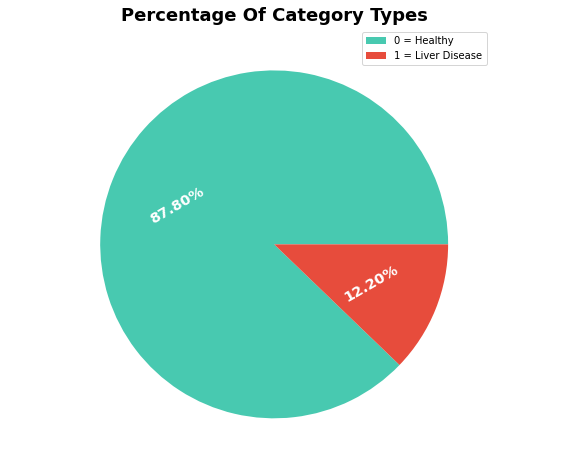

In [151]:
# Percentage of unique values for categorical variables of the df_new dataset.
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(X1['Category']), 
        labels = ['0 = Healthy', '1 = Liver Disease'],
        autopct = '%.2f%%',
        colors = ('#48C9B0','#E74C3C'),
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage Of Category Types', fontsize = 18, fontweight = 'bold')
plt.show()

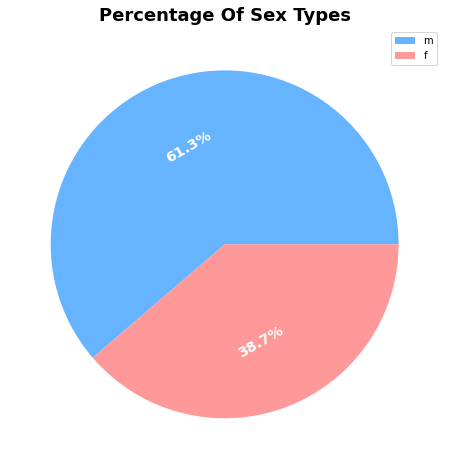

In [103]:
# percentage of unique values for categorical variables of the df_new dataset.
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(X1['Sex']), 
        labels = ['m', 'f'],
        autopct='%1.1f%%',
        colors = ['#66b3ff','#ff9999'],
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage Of Sex Types', fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 0.98, 'Sex vs Category')

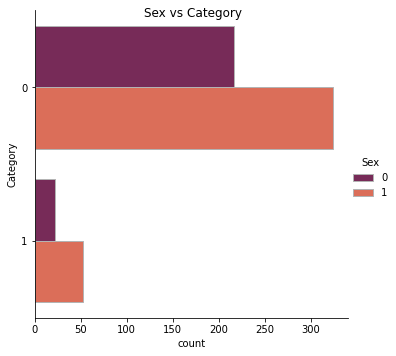

In [166]:
#Catplot of category and sex
g =sns.catplot(y="Category", hue="Sex", kind="count", palette='rocket',edgecolor=".7",
            data=X1)
g.fig.suptitle('Sex vs Category')

#### Analysis of numerical data

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


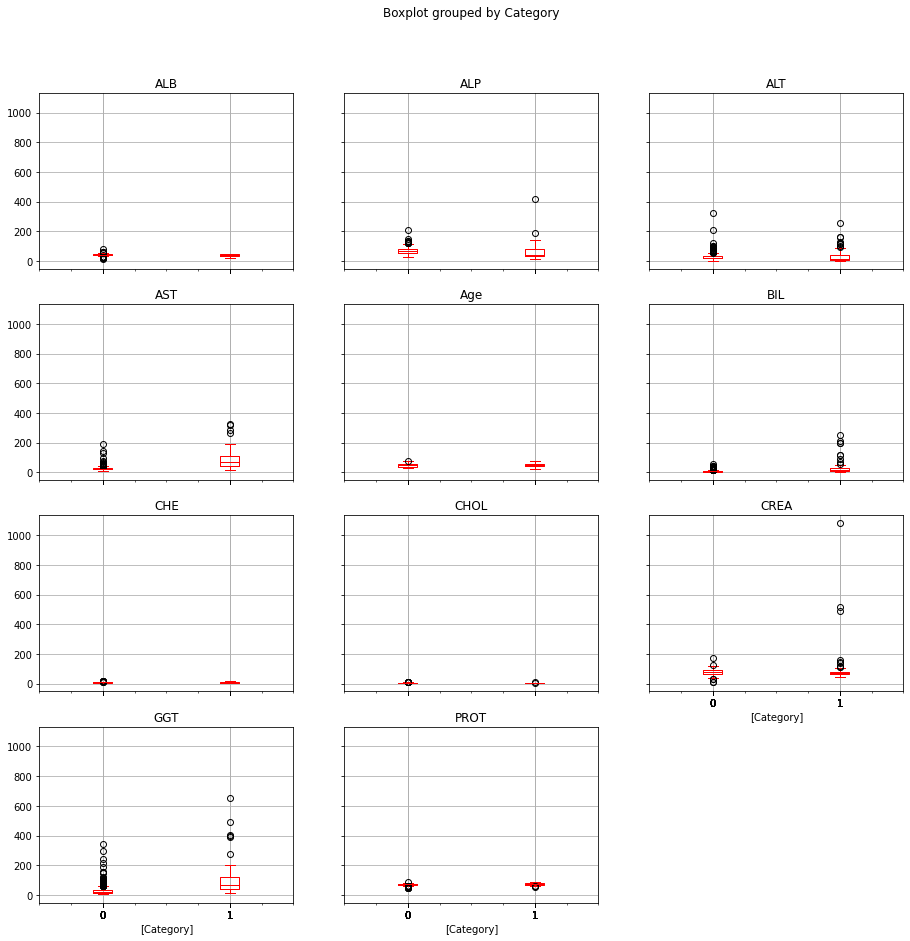

In [150]:
num_cols_viz = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
Target = 'Category'
fig, axes = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (15, 15))
X1.loc[:, [Target]+num_cols_viz].boxplot(by = Target, ax = axes, return_type = 'axes',color ='red');

In [22]:
# The "ALP" boxplot shows that lower the ALP, higher the chance of a person experiencing liver disease.
# The "AST" boxplot shows that higher the AST, higher the chance of a person experiencing Hepatitis C.
# The "CHE" boxplot shows that higher the CHE, higher the chance of a person experiencing Hepatitis C.
# The "BIL" boxplot shows that higher the BIL, higher the chance of a person experiencing Hepatitis C.

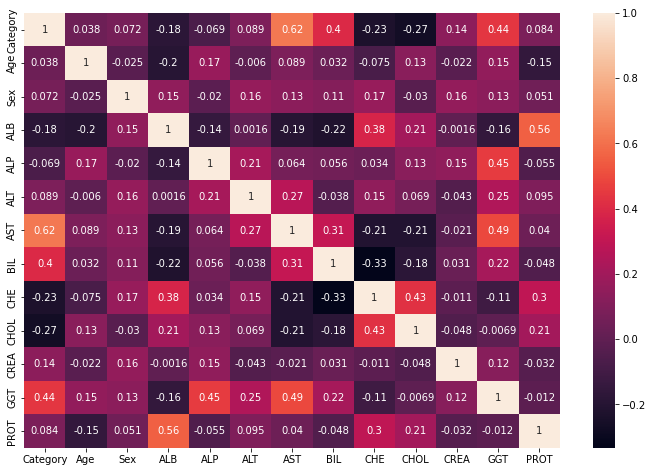

In [23]:
# defining correlation
import matplotlib.pyplot as plt
import seaborn  as sns 

plt.figure(figsize=(12,8))
sns.heatmap(X1.corr(),annot=True)
plt.show()

# Dealing with the NaN value


### Preparing two set of data with different NaN dealing methods applied
### X2 = MICE imputation algorithm
### X3 = drop the NaN rows

In [25]:
# Check the NaN values
X1.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

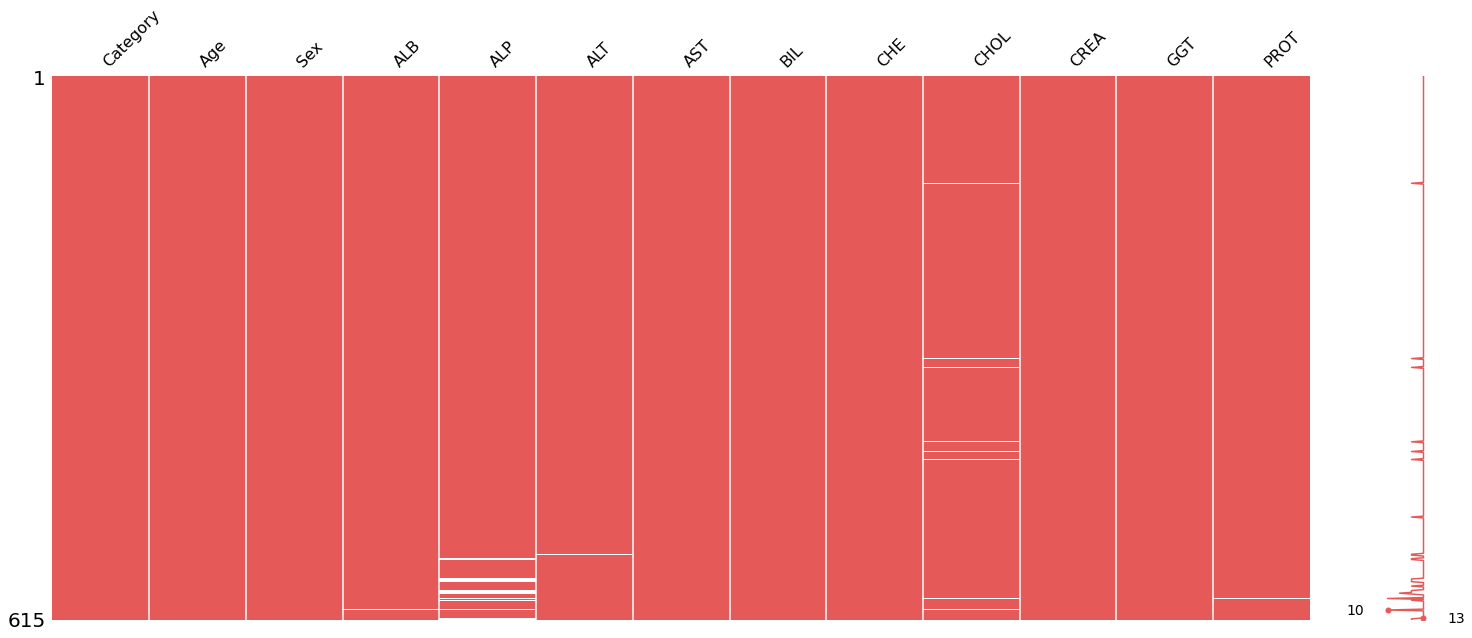

In [43]:
# visualize missing values in dataset
# Importing the libraries
import pandas as pd
import missingno as msno

# Visualize missing values as a matrix
im = msno.matrix(X1, color=(0.9, 0.35, 0.35))


In [46]:
# First method
# Filling the NaN value by performing imputation algortihm
from fancyimpute import IterativeImputer

# calling the  MICE class
mice_imputer = IterativeImputer()

# imputing the missing value with mice imputer
X1_mice = pd.DataFrame(mice_imputer.fit_transform(X1))
X1_mice.columns = X1.columns
X2 = X1_mice
X2.shape

(615, 13)

In [47]:
#check again the NaN values
X2.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [48]:
# Second method
# drop the rows with NaN values
X3 = X1.dropna()
X3.shape

(589, 13)

In [49]:
# check again the NaN values
X3.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

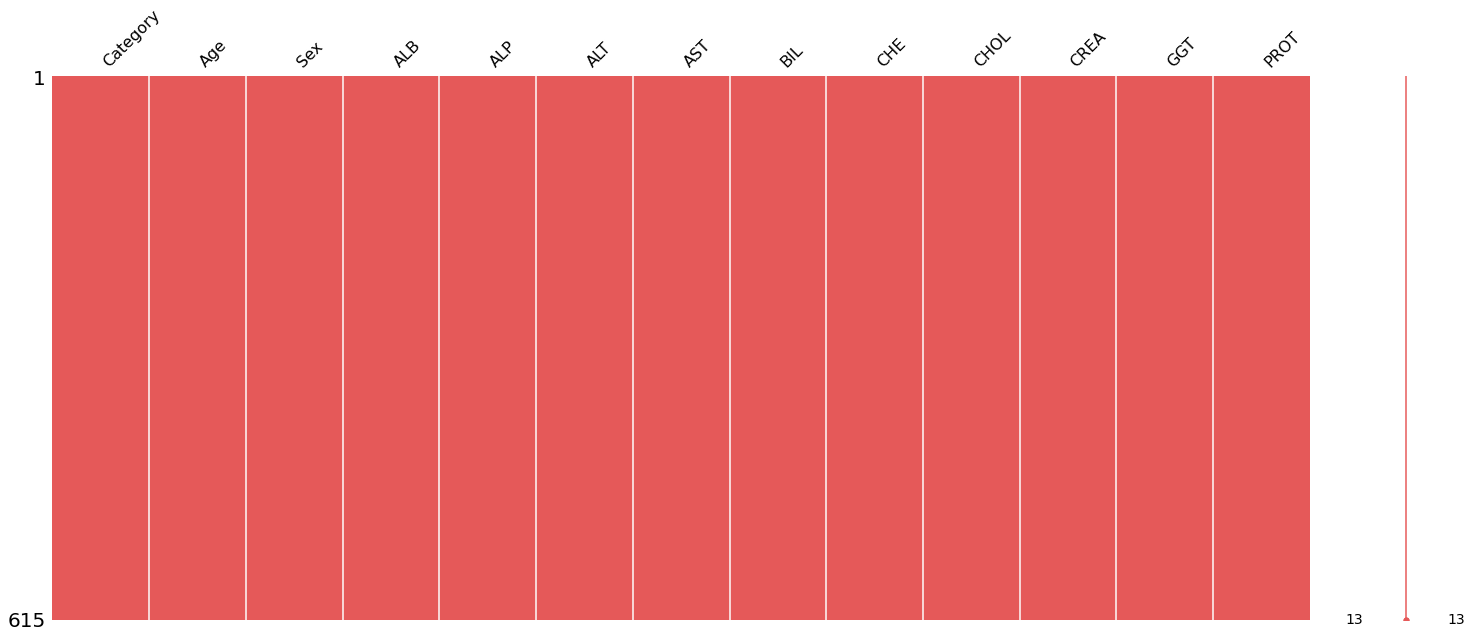

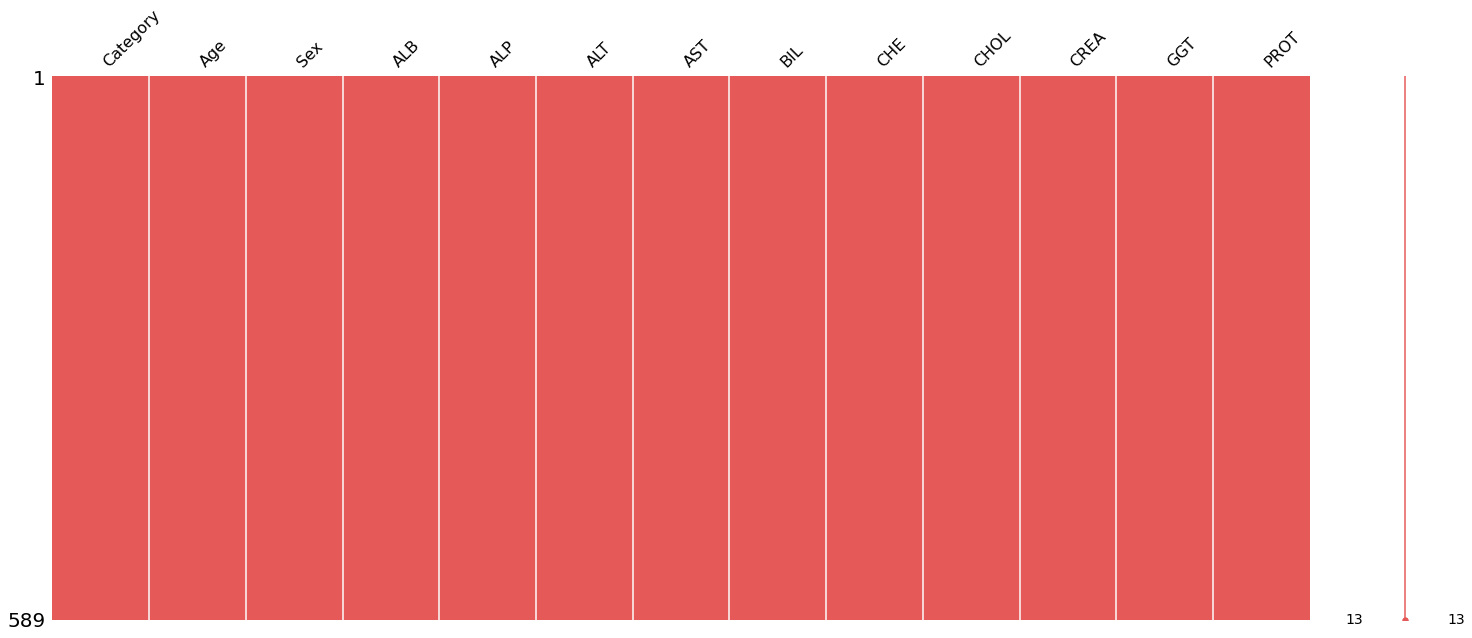

In [50]:
# visualize the missing values again
im = msno.matrix(X2, color=(0.9, 0.35, 0.35))
im = msno.matrix(X3, color=(0.9, 0.35, 0.35))

In [27]:
# df (original dataset), X1 (encoded), X2 (encoded, NaN miced), X3 (encoded, dropNa)

In [28]:
# The variables AST,BIL,GGT has the highest correlation with the Category

# Data Distribution

In [57]:
# Separating the independent and dependent variables 
# X2 is the dataset with its NaN values was filled by MICE function
# X3 is the dataset with its NaN values was dropped away

# Y is the dependent variable/target value
# X is the independent variables/features

Y_mice = X2['Category']
# Y_mice is the target value from X2
X_mice = X2.drop('Category', axis=1)
# X_mice is the features value from X2

Y_drop = X3['Category']
# Y_drop is the target value from X3
X_drop = X3.drop('Category', axis=1)
# X_drop is the features value from X3


In [58]:
#shows the values in the dependent variables
Y_mice.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Category, dtype: float64

In [59]:
#shows the values in the independent variables
X_mice.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32.0,1.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32.0,1.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32.0,1.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32.0,1.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32.0,1.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Training and Testing Data Preparation

In [32]:
from sklearn.model_selection import train_test_split

In [60]:
X_train_mice, X_test_mice, Y_train_mice, Y_test_mice = train_test_split(X_mice, Y_mice,
                                                                        test_size=0.2, random_state=0)
X_train_drop, X_test_drop, Y_train_drop, Y_test_drop = train_test_split(X_drop, Y_drop,
                                                                        test_size=0.2, random_state=0)


# Deal with unbalanced data by using oversampling and undersampling
###     1. apply oversampling on dataset(processed by MICE ) to generate "Synthetic Data"
###     2. apply undersampling on dataset(drop NaN) to generate "Original Data"

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Healthy'), Text(1, 0, 'Liver Disease')]

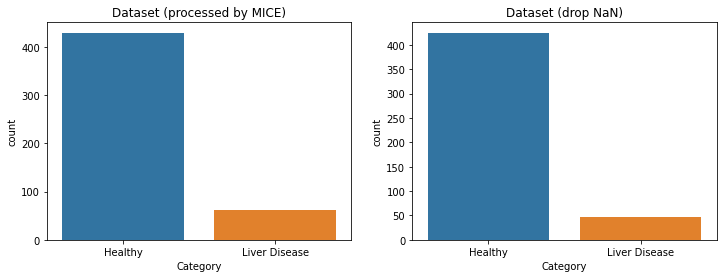

In [34]:
# visualized the targeted variable for unbalanced data
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(Y_train_mice,ax=ax[0])
sns.countplot(Y_train_drop,ax=ax[1])
ax[0].title.set_text('Dataset (processed by MICE)')
ax[1].title.set_text('Dataset (drop NaN)')
ax[0].set_xticklabels(['Healthy','Liver Disease'])
ax[1].set_xticklabels(['Healthy','Liver Disease'])

## Synthetic Data

In [35]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train_mice == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train_mice == 0)))
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(X_train_mice, Y_train_mice.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 62
Before OverSampling, counts of label '0': 430 

After OverSampling, the shape of train_X: (860, 12)
After OverSampling, the shape of train_y: (860,) 

After OverSampling, counts of label '1': 430
After OverSampling, counts of label '0': 430


## Original Data (Realworld Data)

In [36]:
print("Before Undersampling, counts of label '1': {}".format(sum(Y_train_drop == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(Y_train_drop == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
x_train_miss, y_train_miss = nr.fit_resample(X_train_drop, Y_train_drop.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 46
Before Undersampling, counts of label '0': 425 

After Undersampling, the shape of train_X: (92, 12)
After Undersampling, the shape of train_y: (92,) 

After Undersampling, counts of label '1': 46
After Undersampling, counts of label '0': 46


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Healthy'), Text(1, 0, 'Liver Disease')]

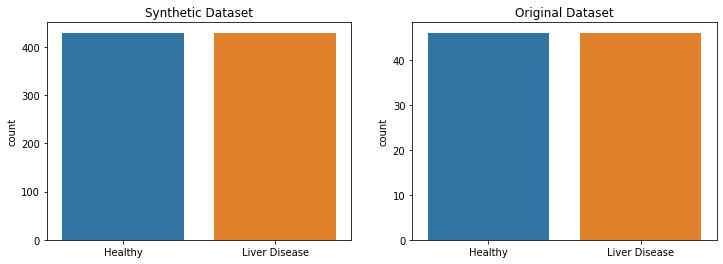

In [37]:
# visualized the targeted variable again after applying SMOTE and NearMiss
# visualized the targeted variable
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(y_train_res,ax=ax[0])
sns.countplot(y_train_miss,ax=ax[1])
ax[0].title.set_text('Synthetic Dataset')
ax[1].title.set_text('Original Dataset')
ax[0].set_xticklabels(['Healthy','Liver Disease'])
ax[1].set_xticklabels(['Healthy','Liver Disease'])

# Training machine learning models

In [38]:
#import machine learnings packages
from sklearn.svm import SVC # Support vector classifier
from sklearn.ensemble import RandomForestClassifier# Random Forest Classifier
from sklearn.neural_network import MLPClassifier# Neural Network Model (Multi-layer Perceptron)
from sklearn.metrics import plot_roc_curve# Plot ROC

#model evaluation purpose
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve

## Synthetic Dataset

In [39]:
# Model Evaluation
def evaluate_model(model,cf_matrix, x_train, y_train, x_test, y_test):
    # Prediction on train dataset and test dataset
    predicted_label1 = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, predicted_label1)
    predicted_label2 = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, predicted_label2)
    
    model_name = type(model).__name__
    # print acccuracy
    print("\nThe accuracy of", model_name, "evaluated on Training Data is: ",train_accuracy )
    print("The accuracy of", model_name, "evaluated on Testing Data is: ", test_accuracy)
    #Classification report
    print('\nClassification report for train data is : \n',
      classification_report(y_train, predicted_label1))
    print('Classification report for test data is : \n',
      classification_report(y_test, predicted_label2))
    
    # Print performance for train dataset and test dataset
    print("\nThe performance of", model_name, "prediction: ")
    accuracy = (cf_matrix[0,0]+cf_matrix[1,1])/(cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
    sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
    specificity = cf_matrix[1,1]/(cf_matrix[0,1]+cf_matrix[1,1])
    precision = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
    #F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    f1 = 2*(sensitivity * precision) / (sensitivity + precision)
    print('Accuracy: ', accuracy)
    print('Sensitivity: ', sensitivity)
    print('Specificity: ',specificity)
    print('Precision: ',precision)
    print('F1 score :',f1)

   

    

### 1. Support vector classifier (Synthetic Data)


roc_auc_score for SVC :  0.9818181818181818


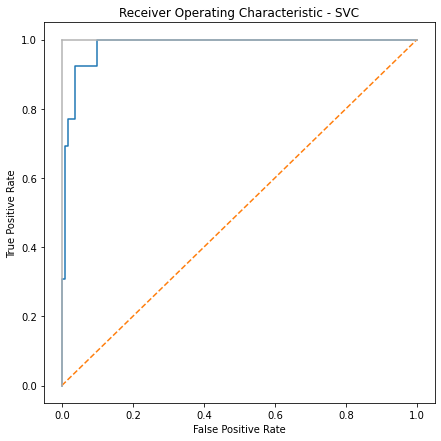

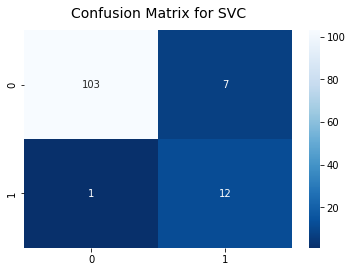


The accuracy of SVC evaluated on Training Data is:  0.9395348837209302
The accuracy of SVC evaluated on Testing Data is:  0.9349593495934959

Classification report for train data is : 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       430
         1.0       0.97      0.91      0.94       430

    accuracy                           0.94       860
   macro avg       0.94      0.94      0.94       860
weighted avg       0.94      0.94      0.94       860

Classification report for test data is : 
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       110
         1.0       0.63      0.92      0.75        13

    accuracy                           0.93       123
   macro avg       0.81      0.93      0.86       123
weighted avg       0.95      0.93      0.94       123


The performance of SVC prediction: 
Accuracy:  0.9349593495934959
Sensitivity:  0.9903846153846154
Specificity:  0.

In [40]:
# Support vector classifier
SVC_model = SVC(probability=True, random_state = 0)
SVC_model.fit(x_train_res, y_train_res)
model_name = type(SVC_model).__name__

# plot ROC
y_score = SVC_model.predict_proba(X_test_mice)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_mice, y_score)
print("\nroc_auc_score for", model_name,": ", roc_auc_score(Y_test_mice, y_score))
plt.subplots(1, figsize=(7,7))
plt.title("Receiver Operating Characteristic - "+model_name)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Confusion Matrix
y_pred = SVC_model.predict(X_test_mice)
cf_matrix = confusion_matrix(Y_test_mice, y_pred)
sns.heatmap(cf_matrix, annot=True,fmt=".0f", cmap="Blues_r")
plt.title("Confusion Matrix for "+model_name, fontsize=14, y=1.03);
plt.show()

# print performance
evaluate_model(SVC_model,cf_matrix,x_train_res,y_train_res,X_test_mice, Y_test_mice)

### 2. Random Forest Classifier (Synthetic Data)


roc_auc_score for RandomForestClassifier :  0.9937062937062937


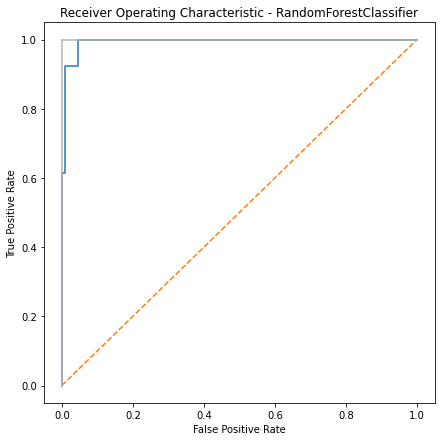

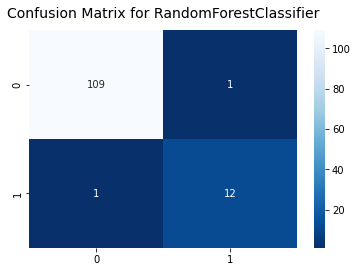


The accuracy of RandomForestClassifier evaluated on Training Data is:  1.0
The accuracy of RandomForestClassifier evaluated on Testing Data is:  0.983739837398374

Classification report for train data is : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       430
         1.0       1.00      1.00      1.00       430

    accuracy                           1.00       860
   macro avg       1.00      1.00      1.00       860
weighted avg       1.00      1.00      1.00       860

Classification report for test data is : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       110
         1.0       0.92      0.92      0.92        13

    accuracy                           0.98       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.98      0.98      0.98       123


The performance of RandomForestClassifier prediction: 
Accuracy:  0.983739837398374
Sensitivi

In [41]:
# Random Forest Classifier
RF_model = RandomForestClassifier(random_state = 0)
RF_model.fit(x_train_res, y_train_res)
model_name = type(RF_model).__name__

# plot ROC
y_score = RF_model.predict_proba(X_test_mice)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_mice, y_score)
print("\nroc_auc_score for", model_name,": ", roc_auc_score(Y_test_mice, y_score))
plt.subplots(1, figsize=(7,7))
plt.title("Receiver Operating Characteristic - "+model_name)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Confusion Matrix
y_pred = RF_model.predict(X_test_mice)
cf_matrix = confusion_matrix(Y_test_mice, y_pred)
sns.heatmap(cf_matrix, annot=True,fmt=".0f", cmap="Blues_r")
plt.title("Confusion Matrix for "+model_name, fontsize=14, y=1.03);
plt.show()

# print performance
evaluate_model(RF_model,cf_matrix,x_train_res, y_train_res,X_test_mice, Y_test_mice)

### 3. Nueral Network(Multi-player percepton) (Synthetic Data)


roc_auc_score for MLPClassifier :  0.9783216783216784


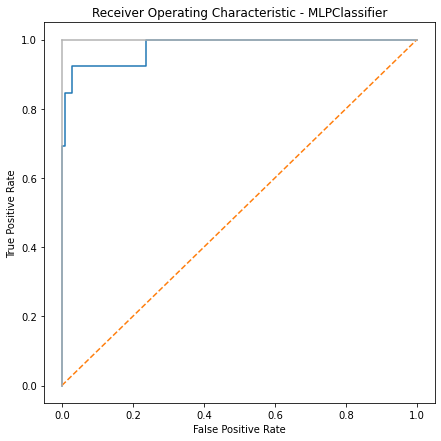

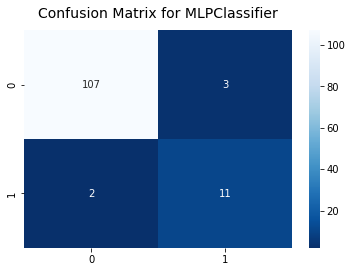


The accuracy of MLPClassifier evaluated on Training Data is:  0.986046511627907
The accuracy of MLPClassifier evaluated on Testing Data is:  0.959349593495935

Classification report for train data is : 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       430
         1.0       1.00      0.98      0.99       430

    accuracy                           0.99       860
   macro avg       0.99      0.99      0.99       860
weighted avg       0.99      0.99      0.99       860

Classification report for test data is : 
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       110
         1.0       0.79      0.85      0.81        13

    accuracy                           0.96       123
   macro avg       0.88      0.91      0.90       123
weighted avg       0.96      0.96      0.96       123


The performance of MLPClassifier prediction: 
Accuracy:  0.959349593495935
Sensitivity:  0.981651

In [42]:
#Neural Network(Multi-layer percepton)
MLP_model = MLPClassifier(max_iter=2000, random_state =0)
MLP_model.fit(x_train_res, y_train_res)
model_name = type(MLP_model).__name__


# plot ROC
y_score = MLP_model.predict_proba(X_test_mice)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_mice, y_score)
print("\nroc_auc_score for", model_name,": ", roc_auc_score(Y_test_mice, y_score))
plt.subplots(1, figsize=(7,7))
plt.title("Receiver Operating Characteristic - "+model_name)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Confusion Matrix
y_pred = MLP_model.predict(X_test_mice)
cf_matrix = confusion_matrix(Y_test_mice, y_pred)
sns.heatmap(cf_matrix, annot=True,fmt=".0f", cmap="Blues_r")
plt.title("Confusion Matrix for "+model_name, fontsize=14, y=1.03);
plt.show()

# print performance
evaluate_model(MLP_model,cf_matrix,x_train_res, y_train_res,X_test_mice, Y_test_mice)

## Original Dataset(Real World Dataset)

### 1. Support vector classifier (Original Dataset)


roc_auc_score for SVC :  0.9842592592592593


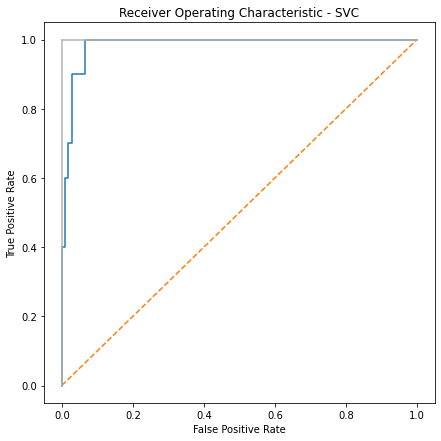

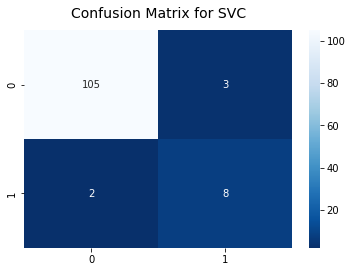


The accuracy of SVC evaluated on Training Data is:  0.9021739130434783
The accuracy of SVC evaluated on Testing Data is:  0.9576271186440678

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        46
           1       1.00      0.80      0.89        46

    accuracy                           0.90        92
   macro avg       0.92      0.90      0.90        92
weighted avg       0.92      0.90      0.90        92

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.73      0.80      0.76        10

    accuracy                           0.96       118
   macro avg       0.85      0.89      0.87       118
weighted avg       0.96      0.96      0.96       118


The performance of SVC prediction: 
Accuracy:  0.9576271186440678
Sensitivity:  0.9813084112149533
Specificity:  0.

In [43]:
# Support vector classifier
SVC_model = SVC(probability=True, random_state = 0)
SVC_model.fit(x_train_miss, y_train_miss)
model_name = type(SVC_model).__name__

# plot ROC
y_score = SVC_model.predict_proba(X_test_drop)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_drop, y_score)
print("\nroc_auc_score for", model_name,": ", roc_auc_score(Y_test_drop, y_score))
plt.subplots(1, figsize=(7,7))
plt.title("Receiver Operating Characteristic - "+model_name)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Confusion Matrix
y_pred = SVC_model.predict(X_test_drop)
cf_matrix = confusion_matrix(Y_test_drop, y_pred)
sns.heatmap(cf_matrix, annot=True,fmt=".0f", cmap="Blues_r")
plt.title("Confusion Matrix for "+model_name, fontsize=14, y=1.03);
plt.show()

# print performance
evaluate_model(SVC_model,cf_matrix,x_train_miss, y_train_miss,X_test_drop, Y_test_drop)

### 2. Random Forest Classifier (Original data)


roc_auc_score for RandomForestClassifier :  1.0


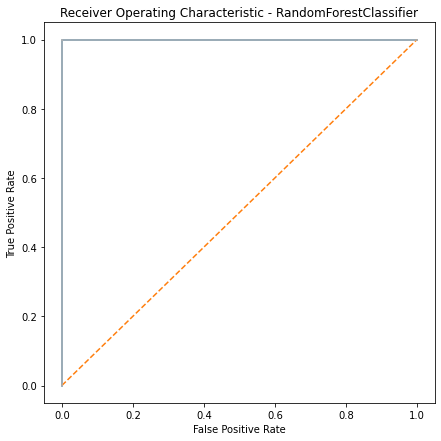

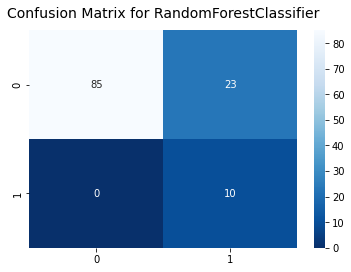


The accuracy of RandomForestClassifier evaluated on Training Data is:  1.0
The accuracy of RandomForestClassifier evaluated on Testing Data is:  0.8050847457627118

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        46

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Classification report for test data is : 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88       108
           1       0.30      1.00      0.47        10

    accuracy                           0.81       118
   macro avg       0.65      0.89      0.67       118
weighted avg       0.94      0.81      0.85       118


The performance of RandomForestClassifier prediction: 
Accuracy:  0.8050847457627118
Sensiti

In [44]:
#Random Forest Classifier
RF_model = RandomForestClassifier(random_state = 0)
RF_model.fit(x_train_miss, y_train_miss)
model_name = type(RF_model).__name__

# plot ROC
y_score = RF_model.predict_proba(X_test_drop)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_drop, y_score)
print("\nroc_auc_score for", model_name,": ", roc_auc_score(Y_test_drop, y_score))
plt.subplots(1, figsize=(7,7))
plt.title("Receiver Operating Characteristic - "+model_name)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Confusion Matrix
y_pred = RF_model.predict(X_test_drop)
cf_matrix = confusion_matrix(Y_test_drop, y_pred)
sns.heatmap(cf_matrix, annot=True,fmt=".0f", cmap="Blues_r")
plt.title("Confusion Matrix for "+model_name, fontsize=14, y=1.03);
plt.show()

# print performance
evaluate_model(RF_model,cf_matrix,x_train_miss, y_train_miss,X_test_drop, Y_test_drop)

### 3. Neural Network(Multi-layer percepton)


roc_auc_score for MLPClassifier :  0.8611111111111112


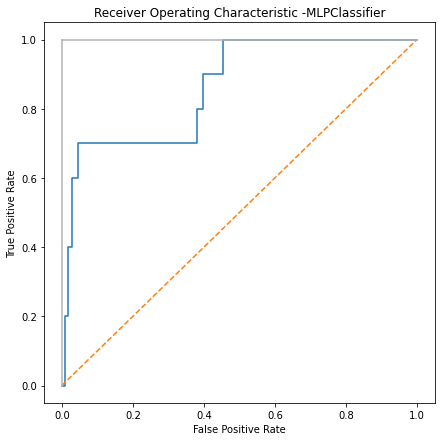

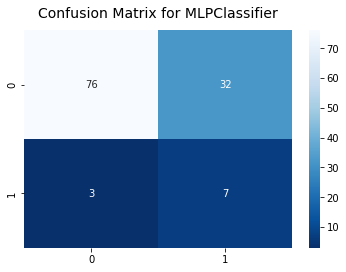


The accuracy of MLPClassifier evaluated on Training Data is:  0.8478260869565217
The accuracy of MLPClassifier evaluated on Testing Data is:  0.7033898305084746

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       1.00      0.70      0.82        46

    accuracy                           0.85        92
   macro avg       0.88      0.85      0.84        92
weighted avg       0.88      0.85      0.84        92

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81       108
           1       0.18      0.70      0.29        10

    accuracy                           0.70       118
   macro avg       0.57      0.70      0.55       118
weighted avg       0.90      0.70      0.77       118


The performance of MLPClassifier prediction: 
Accuracy:  0.7033898305084746
Sensitivity:  0.962

In [45]:
#Neural Network(Multi-layer percepton)
MLP_model = MLPClassifier(max_iter=2000, random_state =0)
MLP_model.fit(x_train_miss, y_train_miss)
model_name = type(MLP_model).__name__

# plot ROC
y_score = MLP_model.predict_proba(X_test_drop)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_drop, y_score)
print("\nroc_auc_score for", model_name,": ", roc_auc_score(Y_test_drop, y_score))
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic -'+model_name)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Confusion Matrix
y_pred = MLP_model.predict(X_test_drop)
cf_matrix = confusion_matrix(Y_test_drop, y_pred)
sns.heatmap(cf_matrix, annot=True,fmt=".0f", cmap="Blues_r")
plt.title("Confusion Matrix for "+model_name, fontsize=14, y=1.03);
plt.show()

# print performance
evaluate_model(MLP_model,cf_matrix,x_train_miss, y_train_miss,X_test_drop, Y_test_drop)

## Identify the Most Important Variables

[0.0255088  0.0076273  0.02098825 0.04482965 0.13209185 0.3667088
 0.08934381 0.03142901 0.04709379 0.01384182 0.20377933 0.0167576 ]


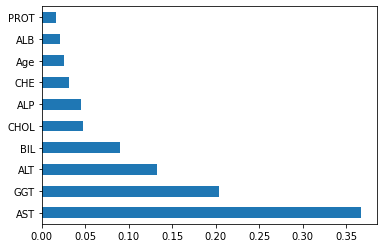

In [46]:
print(RF_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(RF_model.feature_importances_, index=X_train_drop.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


Permutation explainer: 119it [01:18,  1.36it/s]                         


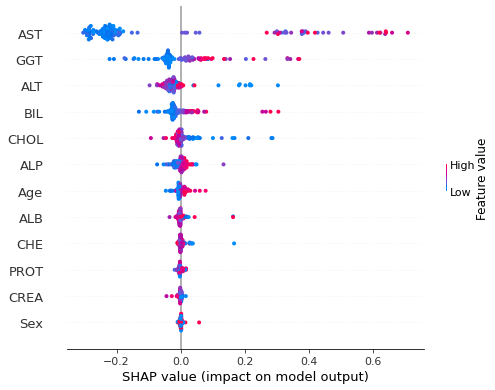

In [47]:
import shap 
#creates shap explainer
feature_names = list(X3.columns)[1:2] + list(X3.columns)[3:] + [list(X3.columns)[2]]
explainer = shap.Explainer(RF_model.predict, X_train_drop, feature_names=feature_names)
shap_values = explainer(X_test_drop)

#plots importance of each feature
shap.summary_plot(shap_values, X_test_drop)

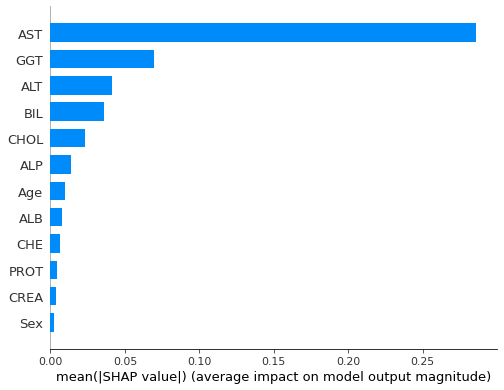

In [48]:
shap.summary_plot(shap_values, X_test_drop, plot_type="bar")

# Test on  random state = 0 to 100
## study the impact of random state on the accuracy of model prediction
## calculate the mean and standard deviation of model's accuracy,specificity,sensitivity,precision and f1 score

In [49]:
# insert row into dataframe function
def insert_row(index, df, df_insert):
    dfA = df.iloc[:index, ]
    dfB = df.iloc[index:, ]
    df = dfA.append(df_insert).append(dfB).reset_index(drop = True)
    return df

#Use the loop to perform the predictions with different random states of data spliting
#return a dataframe of the results with different random states of data spliting.
def prediction_difRandomState(model,RandomStates):
    realDF=pd.DataFrame(columns = ["Random State","Accuracy","Sensitivity","Specificity","Precision","F1"])
    for x in range(RandomStates):
        # use real world dataset
        X_train_drop, X_test_drop, Y_train_drop, Y_test_drop = train_test_split(X_drop, Y_drop, 
                                                                                test_size=0.2, random_state=x)
        # apply NearMiss
        from imblearn.under_sampling import NearMiss
        nr = NearMiss()
        x_train_miss, y_train_miss = nr.fit_resample(X_train_drop, Y_train_drop.ravel())
        # calculate accuracy
        model.fit(x_train_miss,y_train_miss)
        predicted_label2 = model.predict(X_test_drop)
        model_test_accuracy = accuracy_score(Y_test_drop, predicted_label2)
        
        
        # Confusion Matrix performance for train data
        y_pred_test = model.predict(X_test_drop)
        cf_matrix_test = confusion_matrix(Y_test_drop, y_pred_test)
        test_sensitivity = cf_matrix_test[0,0]/(cf_matrix_test[0,0]+cf_matrix_test[1,0])
        test_specificity = cf_matrix_test[1,1]/(cf_matrix_test[0,1]+cf_matrix_test[1,1])
        test_precision = cf_matrix_test[0,0]/(cf_matrix_test[0,0]+cf_matrix_test[0,1])
        # F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        test_f1 = 2*(test_specificity * test_precision) / (test_specificity + test_precision)
        
        # Accuracy Dataframe
        TempoDF = pd.DataFrame([[x,model_test_accuracy,test_sensitivity,test_specificity,test_precision,test_f1]], 
                           columns =["Random State","Accuracy","Sensitivity","Specificity","Precision","F1"])
        realDF = insert_row(x,realDF,TempoDF)
    
    return realDF



In [50]:
# Test on Random State = 0 to 100
SVC_100 = prediction_difRandomState(SVC_model,100)
RF_100 = prediction_difRandomState(RF_model,100)
MLP_100 = prediction_difRandomState(MLP_model,100)


In [51]:
# Suppot Vector Classifer Prediction fit with training dataset in which random state = 0 to 100
print(SVC_100.head())
SVC_mean = SVC_100.mean()
SVC_std = SVC_100.std()
model_name = "SVC"

print("\nThe Mean of ", model_name, "'s Performance of prediction: ")
print(' Mean of Accuracy: ', SVC_mean['Accuracy'])
print(' Mean of Sensitivity: ', SVC_mean['Sensitivity'])
print(' Mean of Specificity: ',SVC_mean['Specificity'])
print(' Mean of Precision: ',SVC_mean['Precision'])
print(' Mean of F1 score :',SVC_mean['F1'])

print("\nThe Standandard Deviation of ", model_name, "'s Performance of prediction: ")
print(' Standandard Deviation of Accuracy: ', SVC_std['Accuracy'])
print(' Standandard Deviation of Sensitivity: ', SVC_std['Sensitivity'])
print(' Standandard Deviation of Specificity: ',SVC_std['Specificity'])
print(' Standandard Deviation of Precision: ',SVC_std['Precision'])
print(' Standandard Deviation of F1 score :',SVC_std['F1'])

  Random State  Accuracy  Sensitivity  Specificity  Precision        F1
0            0  0.957627     0.981308     0.727273   0.972222  0.832095
1            1  0.889831     0.932039     0.600000   0.941176  0.732824
2            2  0.940678     0.980952     0.615385   0.953704  0.748071
3            3  0.923729     0.954545     0.500000   0.963303  0.658307
4            4  0.957627     0.980952     0.769231   0.971698  0.858691

The Mean of  SVC 's Performance of prediction: 
 Mean of Accuracy:  0.9479661016949151
 Mean of Sensitivity:  0.978193644495996
 Mean of Specificity:  0.6898022613781126
 Mean of Precision:  0.9639763918086907
 Mean of F1 score : 0.7990357350507914

The Standandard Deviation of  SVC 's Performance of prediction: 
 Standandard Deviation of Accuracy:  0.02072411150746332
 Standandard Deviation of Sensitivity:  0.01506794888646673
 Standandard Deviation of Specificity:  0.11778993487417004
 Standandard Deviation of Precision:  0.01548251932559822
 Standandard Devi

In [52]:
# Random Forest classifier Predictions fit with training dataset in which random state = 0 to 100
print(RF_100.head())
RF_mean = RF_100.mean()
RF_std = RF_100.std()
model_name = "RandomForestClassifier"

print("\nThe Mean of", model_name, "'s Performance of prediction: ")
print(' Mean of Accuracy: ', RF_mean['Accuracy'])
print(' Mean of Sensitivity: ', RF_mean['Sensitivity'])
print(' Mean of Specificity: ',RF_mean['Specificity'])
print(' Mean of Precision: ',RF_mean['Precision'])
print(' Mean of F1 score :',RF_mean['F1'])

print("\nThe Standandard Deviation of ", model_name, "'s Performance of prediction: ")
print(' Standandard Deviation of Accuracy: ', RF_std['Accuracy'])
print(' Standandard Deviation of Sensitivity: ', RF_std['Sensitivity'])
print(' Standandard Deviation of Specificity: ',RF_std['Specificity'])
print(' Standandard Deviation of Precision: ',RF_std['Precision'])
print(' Standandard Deviation of F1 score :',RF_std['F1'])

  Random State  Accuracy  Sensitivity  Specificity  Precision        F1
0            0  0.805085     1.000000     0.303030   0.787037  0.437580
1            1  0.754237     1.000000     0.355556   0.715686  0.475086
2            2  0.855932     1.000000     0.370370   0.842593  0.514560
3            3  0.830508     1.000000     0.310345   0.816514  0.449747
4            4  0.906780     0.979798     0.526316   0.915094  0.668274

The Mean of RandomForestClassifier 's Performance of prediction: 
 Mean of Accuracy:  0.8622033898305084
 Mean of Sensitivity:  0.9966654681667698
 Mean of Specificity:  0.40379538169822565
 Mean of Precision:  0.8504033566929711
 Mean of F1 score : 0.5434633407185491

The Standandard Deviation of  RandomForestClassifier 's Performance of prediction: 
 Standandard Deviation of Accuracy:  0.03954105155378523
 Standandard Deviation of Sensitivity:  0.0055803984735270295
 Standandard Deviation of Specificity:  0.08355587181717176
 Standandard Deviation of Precisio

In [53]:
# Neural Network(Multi-layer percepton) Prediction fit with training dataset in which random state = 0 to 100
print(MLP_100.head())
MLP_mean = MLP_100.mean()
MLP_std = MLP_100.std()
model_name = "MLPClassifier"


print("\nThe Mean of", model_name, "'s Performance of prediction: ")
print(' Mean of Accuracy: ', MLP_mean['Accuracy'])
print(' Mean of Sensitivity: ', MLP_mean['Sensitivity'])
print(' Mean of Specificity: ',MLP_mean['Specificity'])
print(' Mean of Precision: ',MLP_mean['Precision'])
print(' Mean of F1 score :',MLP_mean['F1'])

print("\nThe Standandard Deviation of ", model_name, "'s Performance of prediction: ")
print(' Standandard Deviation of Accuracy: ', MLP_std['Accuracy'])
print(' Standandard Deviation of Sensitivity: ', MLP_std['Sensitivity'])
print(' Standandard Deviation of Specificity: ',MLP_std['Specificity'])
print(' Standandard Deviation of Precision: ',MLP_std['Precision'])
print(' Standandard Deviation of F1 score :',MLP_std['F1'])


  Random State  Accuracy  Sensitivity  Specificity  Precision        F1
0            0  0.703390     0.962025     0.179487   0.703704  0.286022
1            1  0.838983     0.910891     0.411765   0.901961  0.565408
2            2  0.686441     0.961039     0.170732   0.685185  0.273351
3            3  0.745763     0.934066     0.111111   0.779817  0.194508
4            4  0.728814     0.962500     0.236842   0.726415  0.357216

The Mean of MLPClassifier 's Performance of prediction: 
 Mean of Accuracy:  0.7366949152542372
 Mean of Sensitivity:  0.9559552501258375
 Mean of Specificity:  0.21166833149019776
 Mean of Precision:  0.7443544616010356
 Mean of F1 score : 0.32525198954808

The Standandard Deviation of  MLPClassifier 's Performance of prediction: 
 Standandard Deviation of Accuracy:  0.04017145634524438
 Standandard Deviation of Sensitivity:  0.021661562636553142
 Standandard Deviation of Specificity:  0.06315850242516892
 Standandard Deviation of Precision:  0.048120588870507

# Calculate Confidence interval

In [54]:
import scipy.stats as st
#calculate 95% confidence inerval of accuracy for each model, while the sample size is larger tahn 30
#Support Vector Classifier
def confidence_interval(item,mean,scale):
    interval= st.norm.interval(alpha=0.95, loc=mean[item], scale=scale[item].sem())
    return interval

In [55]:
#Support Vector Classifier
SVC_test_acc_ci = confidence_interval('Accuracy',SVC_mean,SVC_100)
SVC_test_sens_ci = confidence_interval('Sensitivity',SVC_mean,SVC_100)
SVC_test_spec_ci = confidence_interval('Specificity',SVC_mean,SVC_100)
SVC_test_pres_ci = confidence_interval('Precision',SVC_mean,SVC_100)
SVC_test_f1_ci = confidence_interval('F1',SVC_mean,SVC_100)

print("\n95% confidence interval of SVC's Performance is:")
print(' confidence interval of Accuracy: ', SVC_test_acc_ci)
print(' confidence inerval of Sensitivity: ', SVC_test_sens_ci)
print(' confidence inerval of Specificity: ',SVC_test_spec_ci)
print(' confidence inerval of Precision: ',SVC_test_pres_ci)
print(' confidence inerval of F1 score :',SVC_test_f1_ci)
      


95% confidence interval of SVC's Performance is:
 confidence interval of Accuracy:  (0.9439042504782931, 0.9520279529115372)
 confidence inerval of Sensitivity:  (0.9752403807821595, 0.9811469082098325)
 confidence inerval of Specificity:  (0.6667158583686434, 0.7128886643875818)
 confidence inerval of Precision:  (0.9609418737818789, 0.9670109098355024)
 confidence inerval of F1 score : (0.7818619307373337, 0.8162095393642491)


In [56]:
# Random Forest Classifier
RF_test_acc_ci = confidence_interval('Accuracy',RF_mean,RF_100)
RF_test_sens_ci = confidence_interval('Sensitivity',RF_mean,RF_100)
RF_test_spec_ci = confidence_interval('Specificity',RF_mean,RF_100)
RF_test_pres_ci = confidence_interval('Precision',RF_mean,RF_100)
RF_test_f1_ci = confidence_interval('F1',RF_mean,RF_100)

print("\n95% confidence interval of RandomForestClassifier's Performance is:")
print(' confidence interval of Accuracy: ', RF_test_acc_ci)
print(' confidence inerval of Sensitivity: ', RF_test_sens_ci)
print(' confidence inerval of Specificity: ',RF_test_spec_ci)
print(' confidence inerval of Precision: ',RF_test_pres_ci)
print(' confidence inerval of F1 score :',RF_test_f1_ci)


95% confidence interval of RandomForestClassifier's Performance is:
 confidence interval of Accuracy:  (0.8544534861348823, 0.8699532935261345)
 confidence inerval of Sensitivity:  (0.9955717301640203, 0.9977592061695193)
 confidence inerval of Specificity:  (0.38741873175237546, 0.42017203164407585)
 confidence inerval of Precision:  (0.8415002304874832, 0.8593064828984589)
 confidence inerval of F1 score : (0.5272491020835514, 0.5596775793535468)


In [57]:
# Random Forest Classifier
MLP_test_acc_ci = confidence_interval('Accuracy',MLP_mean,MLP_100)
MLP_test_sens_ci = confidence_interval('Sensitivity',MLP_mean,MLP_100)
MLP_test_spec_ci = confidence_interval('Specificity',MLP_mean,MLP_100)
MLP_test_pres_ci = confidence_interval('Precision',MLP_mean,MLP_100)
MLP_test_f1_ci = confidence_interval('F1',MLP_mean,MLP_100)

print("\n95% confidence interval of MLPClassifier's Performance on Testing Data is:")
print(' confidence interval of Accuracy: ', MLP_test_acc_ci)
print(' confidence inerval of Sensitivity: ', MLP_test_sens_ci)
print(' confidence inerval of Specificity: ',MLP_test_spec_ci)
print(' confidence inerval of Precision: ',MLP_test_pres_ci)
print(' confidence inerval of F1 score :',MLP_test_f1_ci)


95% confidence interval of MLPClassifier's Performance on Testing Data is:
 confidence interval of Accuracy:  (0.7288214544899171, 0.7445683760185574)
 confidence inerval of Sensitivity:  (0.9517096618641873, 0.9602008383874877)
 confidence inerval of Specificity:  (0.1992894924831161, 0.22404717049727943)
 confidence inerval of Precision:  (0.7349229994909302, 0.753785923711141)
 confidence inerval of F1 score : (0.3097706819162525, 0.34073329717990747)
